In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
sns.set_style('whitegrid')
%matplotlib inline

In [66]:
df = pd.read_csv('./results_to_lot.csv', )

In [67]:
df['Session_old'] = df['Session']
df['Participant_old'] = df['Participant']

In [68]:
def apply_session_number(row):
    if pd.notna(row['Session_old']):
        return 'S_' + str(row['Session_old'].split('_')[-1])
    else:
#         return 'P_' + str(int(row['Participant_old'].split('_')[1]))
        return 'P'
                   
def apply_participant_number(row):
    if pd.notna(row['Session_old']):
        return str(row['Session_old'].split('_')[1])
    elif pd.notna(row['Participant_old']):
        return str(row['Participant_old'].split('_')[1])
    else:
        return None                   

In [69]:
df['Model'] = df.apply(apply_session_number, axis=1)
df['Participant'] = df.apply(apply_participant_number, axis=1)

In [76]:
df.head(10)

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,...,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,Session_old,Participant_old,Model
0,session_02_02_va_late_fusion,02,Session_02_02,va_late_fusion,parents,0.7670,0.7097,0.7569,0.8286,0.7258,...,0.8584,0.6923,0.6194,0.7101,0.8433,0.7087,0.6058,Session_02_02,NaN,S_02
1,session_02_01_va_late_fusion,02,Session_02_01,va_late_fusion,parents,0.7722,0.7524,0.8571,0.8421,0.6250,...,0.7847,0.6024,0.7592,0.8602,0.8124,0.6135,0.7195,Session_02_01,NaN,S_01
2,session_04_02_va_late_fusion,04,Session_04_02,va_late_fusion,parents,0.7788,0.6933,0.6923,0.8457,0.4746,...,0.8753,0.6512,0.5194,0.7094,0.8602,0.5490,0.6063,Session_04_02,NaN,S_02
3,session_03_01_va_late_fusion,03,Session_03_01,va_late_fusion,parents,0.8861,0.8547,0.8390,0.9253,0.9000,...,0.9271,0.9000,0.7196,0.8553,0.9262,0.9000,0.7549,Session_03_01,NaN,S_01
4,session_03_02_va_late_fusion,03,Session_03_02,va_late_fusion,parents,0.8333,0.7716,0.8075,0.8804,0.8333,...,0.9025,0.6250,0.7736,0.7963,0.8913,0.7143,0.7754,Session_03_02,NaN,S_02
5,session_04_01_va_late_fusion,04,Session_04_01,va_late_fusion,parents,0.8210,0.7404,0.7939,0.8964,0.6429,...,0.8864,0.6429,0.7250,0.7482,0.8914,0.6429,0.6409,Session_04_01,NaN,S_01
6,participant_02_va_late_fusion,02,NaN,va_late_fusion,parents,0.7160,0.7025,0.7804,0.8414,0.5671,...,0.7254,0.6284,0.6913,0.7726,0.7791,0.5962,0.6093,NaN,Participant_02,P
7,participant_03_va_late_fusion,03,NaN,va_late_fusion,parents,0.8222,0.7906,0.7734,0.8784,0.8036,...,0.8722,0.7759,0.6803,0.8026,0.8753,0.7895,0.7103,NaN,Participant_03,P
8,participant_04_va_late_fusion,04,NaN,va_late_fusion,parents,0.8052,0.7025,0.8058,0.8643,0.5753,...,0.8929,0.5915,0.6507,0.7345,0.8784,0.5833,0.6385,NaN,Participant_04,P
9,session_03_02_va_late_fusion,03,Session_03_02,va_late_fusion,specialist,0.8711,0.8257,0.8740,0.9068,NaN,...,0.9284,NaN,0.7613,0.8284,0.9175,NaN,0.7564,Session_03_02,NaN,S_02


In [135]:
def plot_accs(all_df, annotation_type):
    annotation_df = all_df.query(f'Annotation_Type == "{annotation_type}"')
    for acc_type in [
        'Accuracy', 
        'Accuracy_Balanced'
    ]:
        print(f'{acc_type} with "{annotation_type}" Annotation')
        plot = sns.barplot(
            data=annotation_df, 
            x="Participant", 
            y=acc_type, 
            hue="Model", 
            hue_order=['S_01', 'S_02', 'P'], 
            order=['02', '03', '04'],
        
        )
#         plot.set(title=f'{acc_type} with "{annotation_type}" Annotation')
        plot.set_ylim(0, 1)
        
        sns.move_legend(plot, 'lower center', bbox_to_anchor=(0.9, 0))
        plt.show()

Accuracy with "parents" Annotation


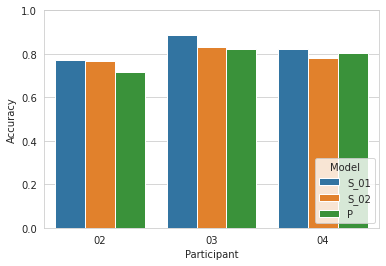

Accuracy_Balanced with "parents" Annotation


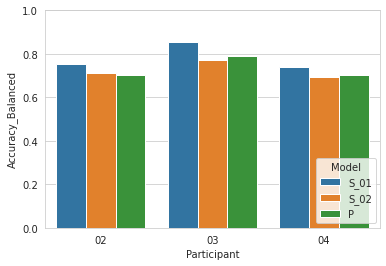

Accuracy with "specialist" Annotation


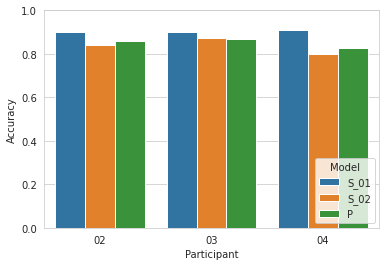

Accuracy_Balanced with "specialist" Annotation


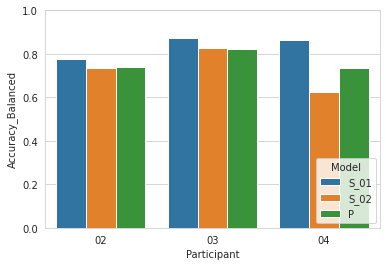

In [136]:
for annotation_type in ['parents', 'specialist']:
    plot_accs(df, annotation_type)